In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=16)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [3]:
train = pd.read_csv("train_data.csv")

In [3]:
train = train.drop(train.columns[0],axis=1)
train.shape

(100000, 131)

In [4]:
cat_vars=['GENDER','AGE','CHARGE_CITY_CD','CONTACT_CITY_CD','EDUCATION_CD','MARRIAGE_CD','OCCUPATION_CLASS_CD','APC_1ST_AGE',
          'INSD_1ST_AGE','RFM_R','REBUY_TIMES_CNT','LEVEL','LIFE_CNT','A_IND','B_IND','C_IND','X_A_IND','X_B_IND','X_C_IND',
          'X_D_IND','X_E_IND','X_F_IND','X_G_IND','X_H_IND','IF_ISSUE_INSD_A_IND','IF_ISSUE_INSD_B_IND','IF_ISSUE_INSD_C_IND',
          'IF_ISSUE_INSD_D_IND','IF_ISSUE_INSD_E_IND','IF_ISSUE_INSD_F_IND','IF_ISSUE_INSD_G_IND','IF_ISSUE_INSD_H_IND',
          'IF_ISSUE_INSD_I_IND','IF_ISSUE_INSD_J_IND','IF_ISSUE_INSD_K_IND','IF_ISSUE_INSD_L_IND','IF_ISSUE_INSD_M_IND',
          'IF_ISSUE_INSD_N_IND','IF_ISSUE_INSD_O_IND','IF_ISSUE_INSD_P_IND','IF_ISSUE_INSD_Q_IND','IF_ADD_INSD_F_IND',
          'IF_ADD_INSD_L_IND','IF_ADD_INSD_Q_IND','IF_ADD_INSD_G_IND','IF_ADD_INSD_R_IND','IF_ADD_INSD_IND','CUST_9_SEGMENTS_CD',
          'FINANCETOOLS_A','FINANCETOOLS_B','FINANCETOOLS_C','FINANCETOOLS_D','FINANCETOOLS_E','FINANCETOOLS_F','FINANCETOOLS_G']
len(cat_vars)

55

In [5]:
for var in cat_vars:
    cat_list = pd.get_dummies(train[var], prefix=var)
    train1=train.join(cat_list)
    train=train1
    
cat_vars=['GENDER','AGE','CHARGE_CITY_CD','CONTACT_CITY_CD','EDUCATION_CD','MARRIAGE_CD','OCCUPATION_CLASS_CD','APC_1ST_AGE',
          'INSD_1ST_AGE','RFM_R','REBUY_TIMES_CNT','LEVEL','LIFE_CNT','A_IND','B_IND','C_IND','X_A_IND','X_B_IND','X_C_IND',
          'X_D_IND','X_E_IND','X_F_IND','X_G_IND','X_H_IND','IF_ISSUE_INSD_A_IND','IF_ISSUE_INSD_B_IND','IF_ISSUE_INSD_C_IND',
          'IF_ISSUE_INSD_D_IND','IF_ISSUE_INSD_E_IND','IF_ISSUE_INSD_F_IND','IF_ISSUE_INSD_G_IND','IF_ISSUE_INSD_H_IND',
          'IF_ISSUE_INSD_I_IND','IF_ISSUE_INSD_J_IND','IF_ISSUE_INSD_K_IND','IF_ISSUE_INSD_L_IND','IF_ISSUE_INSD_M_IND',
          'IF_ISSUE_INSD_N_IND','IF_ISSUE_INSD_O_IND','IF_ISSUE_INSD_P_IND','IF_ISSUE_INSD_Q_IND','IF_ADD_INSD_F_IND',
          'IF_ADD_INSD_L_IND','IF_ADD_INSD_Q_IND','IF_ADD_INSD_G_IND','IF_ADD_INSD_R_IND','IF_ADD_INSD_IND','CUST_9_SEGMENTS_CD',
          'FINANCETOOLS_A','FINANCETOOLS_B','FINANCETOOLS_C','FINANCETOOLS_D','FINANCETOOLS_E','FINANCETOOLS_F','FINANCETOOLS_G']
data_vars=train.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [6]:
train_final=train[to_keep]
train_final.columns.values

array(['LAST_A_CCONTACT_DT', 'L1YR_A_ISSUE_CNT', 'LAST_A_ISSUE_DT',
       'L1YR_B_ISSUE_CNT', 'LAST_B_ISSUE_DT', 'CHANNEL_A_POL_CNT',
       'CHANNEL_B_POL_CNT', 'APC_CNT', 'INSD_CNT', 'IF_2ND_GEN_IND',
       'APC_1ST_YEARDIF', 'RFM_M_LEVEL', 'IF_ISSUE_A_IND',
       'IF_ISSUE_B_IND', 'IF_ISSUE_C_IND', 'IF_ISSUE_D_IND',
       'IF_ISSUE_E_IND', 'IF_ISSUE_F_IND', 'IF_ISSUE_G_IND',
       'IF_ISSUE_H_IND', 'IF_ISSUE_I_IND', 'IF_ISSUE_J_IND',
       'IF_ISSUE_K_IND', 'IF_ISSUE_L_IND', 'IF_ISSUE_M_IND',
       'IF_ISSUE_N_IND', 'IF_ISSUE_O_IND', 'IF_ISSUE_P_IND',
       'IF_ISSUE_Q_IND', 'IF_ADD_F_IND', 'IF_ADD_L_IND', 'IF_ADD_Q_IND',
       'IF_ADD_G_IND', 'IF_ADD_R_IND', 'IF_ADD_IND', 'ANNUAL_PREMIUM_AMT',
       'AG_CNT', 'AG_NOW_CNT', 'CLC_CUR_NUM', 'ANNUAL_INCOME_AMT',
       'L1YR_PAYMENT_REMINDER_IND', 'L1YR_LAPSE_IND', 'LAST_B_CONTACT_DT',
       'LAST_C_DT', 'L1YR_C_CNT', 'BANK_NUMBER_CNT',
       'INSD_LAST_YEARDIF_CNT', 'BMI', 'IF_S_REAL_IND', 'IF_Y_REAL_IND',
       'IM_CNT',

In [7]:
train_final=train_final.drop(['EDUCATION_CD_2.1690752536569398','OCCUPATION_CLASS_CD_1.3049666805497708',
                  'APC_1ST_AGE_2.5215275573891884','INSD_1ST_AGE_2.4884853098798945','RFM_R_2.382605015342292',
                  'REBUY_TIMES_CNT_1.9878874431397442','LEVEL_3.5579151600670254'],axis=1)
train_final.shape

(100000, 269)

In [8]:
X = train_final.loc[:, train_final.columns != 'Y1']
y = train_final.loc[:, train_final.columns == 'Y1']

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X, os_data_y = os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data = os_data_X, columns = columns )
os_data_y = pd.DataFrame(data = os_data_y, columns = ['Y1'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['Y1']==0]))
print("Number of subscription",len(os_data_y[os_data_y['Y1']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['Y1']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['Y1']==1])/len(os_data_X))

Using TensorFlow backend.
C:\Users\dakin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\dakin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\dakin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\dakin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

length of oversampled data is  137206
Number of no subscription in oversampled data 68603
Number of subscription 68603
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [9]:
cols=['LAST_A_ISSUE_DT','APC_1ST_YEARDIF','IF_ISSUE_A_IND','IF_ISSUE_I_IND','IF_ISSUE_O_IND','ANNUAL_PREMIUM_AMT',
      'BANK_NUMBER_CNT','INSD_LAST_YEARDIF_CNT','POLICY_VALUE_AMT','ANNUITY_AMT','EXPIRATION_AMT','ILL_ACCELERATION_AMT',
      'LIFE_INSD_CNT','GENDER_-1.0','AGE_2','AGE_3','CHARGE_CITY_CD_2','CHARGE_CITY_CD_7','CONTACT_CITY_CD_2',
      'CONTACT_CITY_CD_7','OCCUPATION_CLASS_CD_0.0','OCCUPATION_CLASS_CD_1.0','OCCUPATION_CLASS_CD_2.0','OCCUPATION_CLASS_CD_3.0',
      'OCCUPATION_CLASS_CD_4.0','OCCUPATION_CLASS_CD_5.0','OCCUPATION_CLASS_CD_6.0','INSD_1ST_AGE_1.0','RFM_R_1.0','RFM_R_2.0',
      'RFM_R_3.0','RFM_R_4.0','REBUY_TIMES_CNT_1.0','REBUY_TIMES_CNT_2.0','REBUY_TIMES_CNT_3.0','REBUY_TIMES_CNT_4.0','LEVEL_1.0',
      'LEVEL_2.0','LEVEL_3.0','LEVEL_4.0','LEVEL_5.0','X_G_IND_-1.0','IF_ISSUE_INSD_E_IND_1.0','IF_ADD_INSD_IND_-1.0',
      'IF_ADD_INSD_IND_0.0','IF_ADD_INSD_IND_1.0','CUST_9_SEGMENTS_CD_0','FINANCETOOLS_E_1.0','FINANCETOOLS_F_-1.0',
      'FINANCETOOLS_F_0.0']
len(cols)

50

In [10]:
X=os_data_X[cols]
y=os_data_y

In [11]:
X.shape

(137206, 50)

In [12]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.480512
         Iterations 8
                              Results: Logit
Model:                  Logit              Pseudo R-squared:   0.307      
Dependent Variable:     Y1                 AIC:                131958.1284
Date:                   2019-10-05 16:31   BIC:                132449.5903
No. Observations:       137206             Log-Likelihood:     -65929.    
Df Model:               49                 LL-Null:            -95104.    
Df Residuals:           137156             LLR p-value:        0.0000     
Converged:              1.0000             Scale:              1.0000     
No. Iterations:         8.0000                                            
--------------------------------------------------------------------------
                         Coef.   Std.Err.    z     P>|z|   [0.025   0.975]
--------------------------------------------------------------------------
LAST_A_ISSUE_DT           1.

In [13]:
undesired = ['ANNUAL_PREMIUM_AMT','REBUY_TIMES_CNT_1.0','REBUY_TIMES_CNT_2.0','REBUY_TIMES_CNT_3.0','REBUY_TIMES_CNT_4.0',
             'CHARGE_CITY_CD_7','X_G_IND_-1.0','IF_ADD_INSD_IND_1.0']
cols = [i for i in cols if i not in undesired]
len(cols)

42

In [14]:
X=X[cols]
X.shape

(137206, 42)

In [16]:
train_corr=pd.concat([X,y],axis=1)
train_corr

,LAST_A_ISSUE_DT,APC_1ST_YEARDIF,IF_ISSUE_A_IND,IF_ISSUE_I_IND,IF_ISSUE_O_IND,BANK_NUMBER_CNT,INSD_LAST_YEARDIF_CNT,POLICY_VALUE_AMT,ANNUITY_AMT,EXPIRATION_AMT,...,LEVEL_4.0,LEVEL_5.0,IF_ISSUE_INSD_E_IND_1.0,IF_ADD_INSD_IND_-1.0,IF_ADD_INSD_IND_0.0,CUST_9_SEGMENTS_CD_0,FINANCETOOLS_E_1.0,FINANCETOOLS_F_-1.0,FINANCETOOLS_F_0.0,Y1
0,0.000000,0.258769,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000071,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.000000,0.000000,0
1,0.000000,0.279070,0.000000,0.000000,0.000000,0.125000,0.289474,0.000494,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.0,1.000000,0.000000,0
2,1.000000,0.023256,0.000000,1.000000,0.000000,0.000000,0.026316,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.0,1.000000,0.000000,0
3,0.000000,0.046512,0.000000,0.000000,0.000000,0.000000,0.052632,0.000868,0.002359,0.000321,...,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.0,1.000000,0.000000,0
4,0.000000,0.162791,0.000000,1.000000,0.000000,0.250000,0.105263,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,1.000000,1
5,0.000000,0.258769,0.000000,0.000000,0.000000,0.000000,0.184210,0.000000,0.001566,0.000000,...,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.0,1.000000,0.000000,0
6,1.000000,0.627907,0.000000,1.000000,0.000000,0.125000,0.052632,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.0,1.000000,0.0,0.0,0.000000,1.000000,0
7,0.000000,0.162791,0.000000,0.000000,0.000000,0.125000,0.184210,0.000868,0.002359,0.000321,...,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.0,1.000000,0.000000,0
8,0.000000,0.697674,0.000000,0.000000,0.000000,0.000000,0.263158,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,1.000000,0
9,0.000000,0.023256,0.000000,0.000000,0.000000,0.125000,0.026316,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.0,1.000000,0.0,0.0,1.000000,0.000000,0


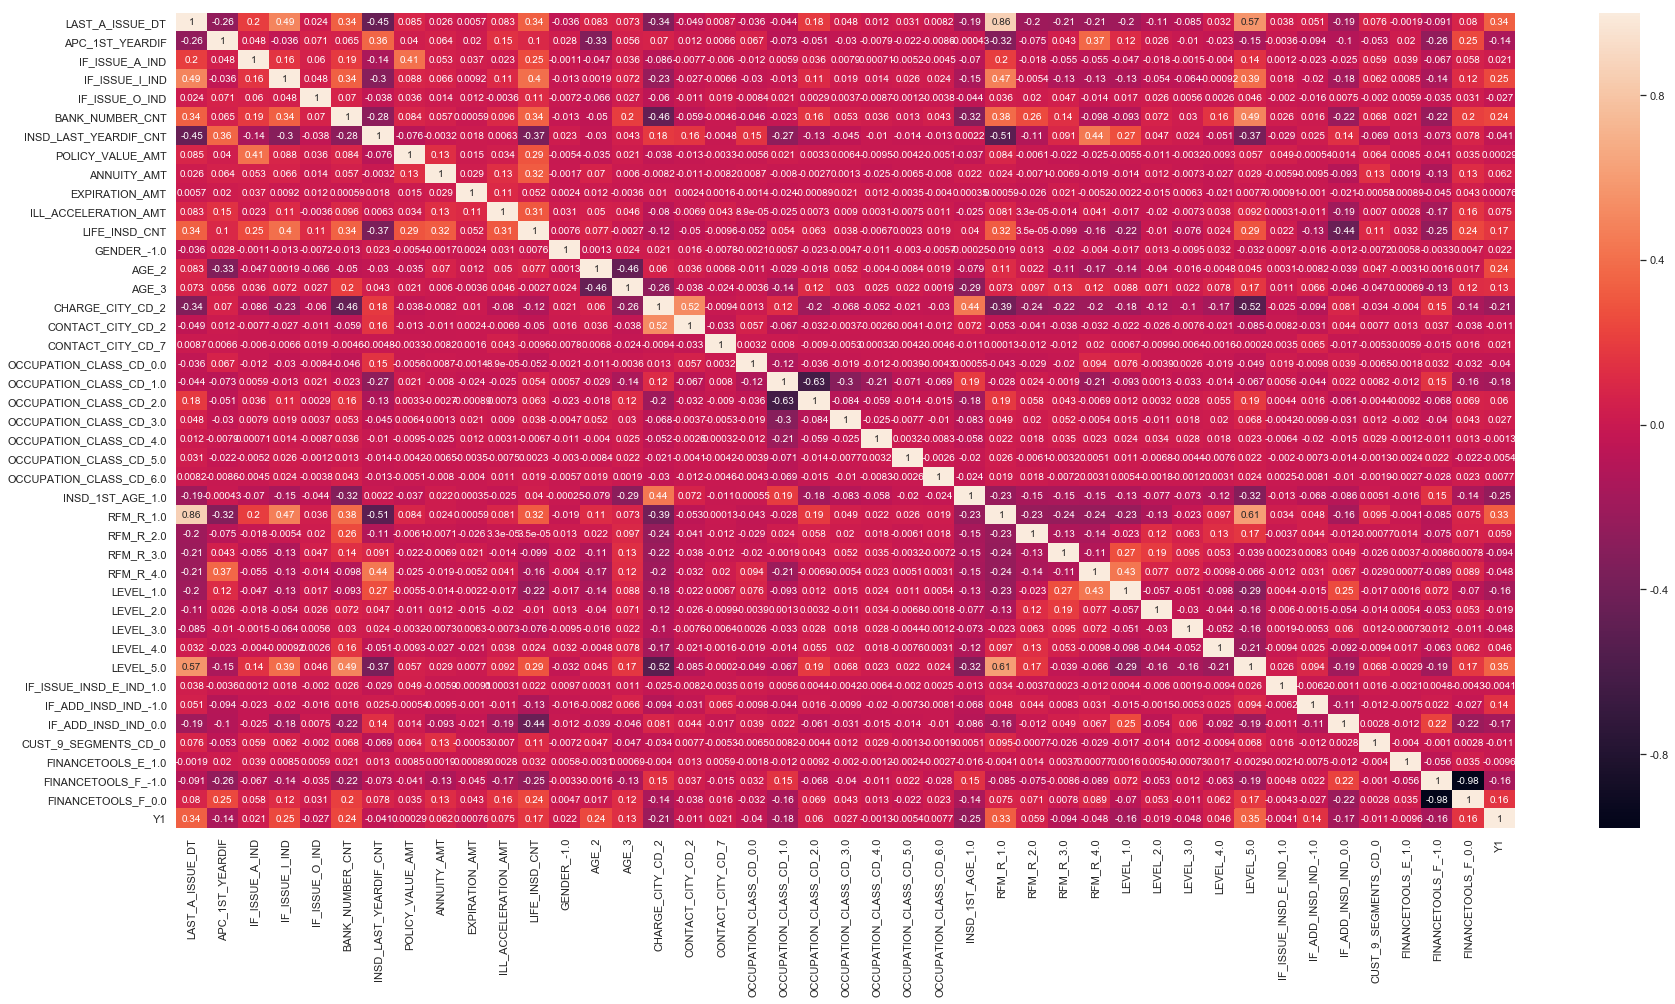

In [18]:
corr_matrix=train_corr.corr()
f,ax=plt.subplots(figsize=(30,15))
sns_plot = sns.heatmap(corr_matrix,vmax=1,annot=True)

In [20]:
fig = sns_plot.get_figure()
fig.savefig('corr.jpg')

In [22]:
top_corr_feature=corr_matrix.index[abs(corr_matrix["Y1"])>0.3]
print(top_corr_feature)

Index(['LAST_A_ISSUE_DT', 'RFM_R_1.0', 'LEVEL_5.0', 'Y1'], dtype='object')


In [234]:
cols=['LAST_A_ISSUE_DT', 'IF_ISSUE_I_IND', 'BANK_NUMBER_CNT', 'AGE_2',
       'CHARGE_CITY_CD_2', 'INSD_1ST_AGE_1.0', 'RFM_R_1.0', 'LEVEL_5.0']
len(cols)

8

In [200]:
cols=['LAST_A_ISSUE_DT', 'RFM_R_1.0', 'LEVEL_5.0']
len(cols)

3

In [235]:
X=X[cols]

In [236]:
X.shape

(137206, 8)

In [237]:
y.shape

(137206, 1)

In [238]:
y_mod=y['Y1']
type(y_mod)

pandas.core.series.Series

In [239]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_mod, test_size=0.3)

In [146]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

C:\Users\dakin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [147]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8979237366557545

# Method 1

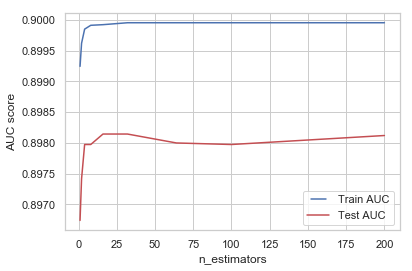

In [131]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []

for estimator in n_estimators:
    
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(X_train, y_train)
    
   train_pred = rf.predict(X_train)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
    
   y_pred = rf.predict(X_test)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

C:\Users\dakin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dakin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dakin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dakin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dakin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

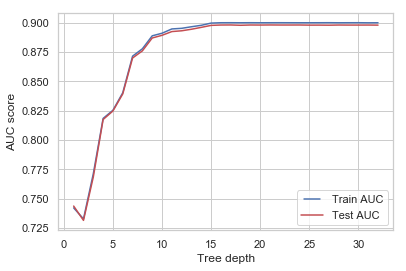

In [132]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
    
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(X_train, y_train)

   train_pred = rf.predict(X_train)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
    
   y_pred = rf.predict(X_test)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

C:\Users\dakin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dakin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dakin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dakin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dakin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

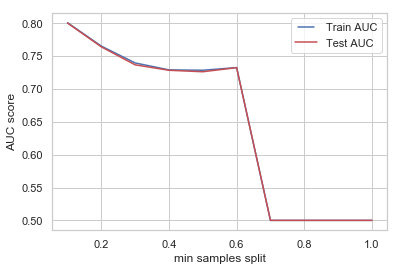

In [133]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    
   rf = RandomForestClassifier(min_samples_split=min_samples_split)
   rf.fit(X_train, y_train)
    
   train_pred = rf.predict(X_train)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
    
   y_pred = rf.predict(X_test)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

C:\Users\dakin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dakin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dakin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dakin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dakin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

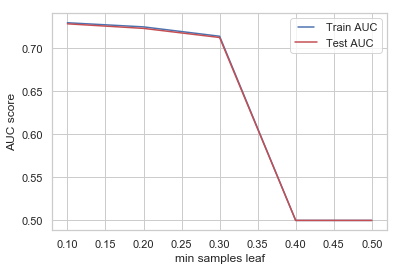

In [134]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    
   rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
   rf.fit(X_train, y_train)
    
   train_pred = rf.predict(X_train)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
    
   y_pred = rf.predict(X_test)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

C:\Users\dakin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dakin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dakin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dakin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dakin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

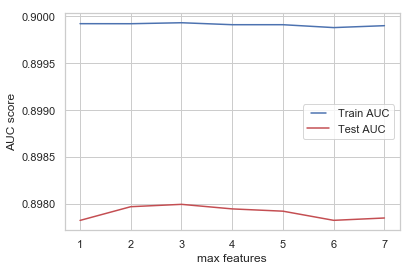

In [135]:
max_features = list(range(1,X.shape[1]))
train_results = []
test_results = []

for max_feature in max_features:
    
   rf = RandomForestClassifier(max_features=max_feature)
   rf.fit(X_train, y_train)
    
   train_pred = rf.predict(X_train)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
    
   y_pred = rf.predict(X_test)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results,'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

In [144]:
rf = RandomForestClassifier(n_estimators=15,max_features=3)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [148]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8979237366557545

# Method 2 (1831)

In [152]:
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
# number of features at every split
max_features = list(range(1,X.shape[1]))

# max depth
max_depth = np.linspace(1, 32, 32, endpoint=True)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
# Random search of parameters
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rf_random.fit(X_train, y_train)
# print results
print(rf_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   52.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.8min finished


{'n_estimators': 200, 'max_features': 2, 'max_depth': 32.0}


In [256]:
rf = RandomForestClassifier(n_estimators=200,max_depth=32,max_features=2)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [257]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8961724801181248

# Method 3 SVC (7238)

In [265]:
from sklearn.model_selection import GridSearchCV
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [266]:
svc_param_selection(X_train,y_train,3)

{'C': 10, 'gamma': 1}

In [267]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf',C=10,gamma=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [268]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8586005827875255

# Method 4 KNN (17767)

In [199]:
from sklearn import neighbors

In [240]:
knn = neighbors.KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [241]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8788471915029411

# Test Output

In [242]:
test = pd.read_csv('test_data.csv')

In [243]:
test=test.drop(['CUS_ID',test.columns[0]],axis=1)
test.shape

(150000, 130)

In [244]:
cat_vars=['GENDER','AGE','CHARGE_CITY_CD','CONTACT_CITY_CD','EDUCATION_CD','MARRIAGE_CD','OCCUPATION_CLASS_CD','APC_1ST_AGE',
          'INSD_1ST_AGE','RFM_R','REBUY_TIMES_CNT','LEVEL','LIFE_CNT','A_IND','B_IND','C_IND','X_A_IND','X_B_IND','X_C_IND',
          'X_D_IND','X_E_IND','X_F_IND','X_G_IND','X_H_IND','IF_ISSUE_INSD_A_IND','IF_ISSUE_INSD_B_IND','IF_ISSUE_INSD_C_IND',
          'IF_ISSUE_INSD_D_IND','IF_ISSUE_INSD_E_IND','IF_ISSUE_INSD_F_IND','IF_ISSUE_INSD_G_IND','IF_ISSUE_INSD_H_IND',
          'IF_ISSUE_INSD_I_IND','IF_ISSUE_INSD_J_IND','IF_ISSUE_INSD_K_IND','IF_ISSUE_INSD_L_IND','IF_ISSUE_INSD_M_IND',
          'IF_ISSUE_INSD_N_IND','IF_ISSUE_INSD_O_IND','IF_ISSUE_INSD_P_IND','IF_ISSUE_INSD_Q_IND','IF_ADD_INSD_F_IND',
          'IF_ADD_INSD_L_IND','IF_ADD_INSD_Q_IND','IF_ADD_INSD_G_IND','IF_ADD_INSD_R_IND','IF_ADD_INSD_IND','CUST_9_SEGMENTS_CD',
          'FINANCETOOLS_A','FINANCETOOLS_B','FINANCETOOLS_C','FINANCETOOLS_D','FINANCETOOLS_E','FINANCETOOLS_F','FINANCETOOLS_G']
len(cat_vars)

55

In [245]:
for var in cat_vars:
    cat_list = pd.get_dummies(test[var], prefix=var)
    test1=test.join(cat_list)
    test=test1
    
cat_vars=['GENDER','AGE','CHARGE_CITY_CD','CONTACT_CITY_CD','EDUCATION_CD','MARRIAGE_CD','OCCUPATION_CLASS_CD','APC_1ST_AGE',
          'INSD_1ST_AGE','RFM_R','REBUY_TIMES_CNT','LEVEL','LIFE_CNT','A_IND','B_IND','C_IND','X_A_IND','X_B_IND','X_C_IND',
          'X_D_IND','X_E_IND','X_F_IND','X_G_IND','X_H_IND','IF_ISSUE_INSD_A_IND','IF_ISSUE_INSD_B_IND','IF_ISSUE_INSD_C_IND',
          'IF_ISSUE_INSD_D_IND','IF_ISSUE_INSD_E_IND','IF_ISSUE_INSD_F_IND','IF_ISSUE_INSD_G_IND','IF_ISSUE_INSD_H_IND',
          'IF_ISSUE_INSD_I_IND','IF_ISSUE_INSD_J_IND','IF_ISSUE_INSD_K_IND','IF_ISSUE_INSD_L_IND','IF_ISSUE_INSD_M_IND',
          'IF_ISSUE_INSD_N_IND','IF_ISSUE_INSD_O_IND','IF_ISSUE_INSD_P_IND','IF_ISSUE_INSD_Q_IND','IF_ADD_INSD_F_IND',
          'IF_ADD_INSD_L_IND','IF_ADD_INSD_Q_IND','IF_ADD_INSD_G_IND','IF_ADD_INSD_R_IND','IF_ADD_INSD_IND','CUST_9_SEGMENTS_CD',
          'FINANCETOOLS_A','FINANCETOOLS_B','FINANCETOOLS_C','FINANCETOOLS_D','FINANCETOOLS_E','FINANCETOOLS_F','FINANCETOOLS_G']
data_vars=test.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [246]:
test_final=test[to_keep]
test_final.columns.values

array(['LAST_A_CCONTACT_DT', 'L1YR_A_ISSUE_CNT', 'LAST_A_ISSUE_DT',
       'L1YR_B_ISSUE_CNT', 'LAST_B_ISSUE_DT', 'CHANNEL_A_POL_CNT',
       'CHANNEL_B_POL_CNT', 'APC_CNT', 'INSD_CNT', 'IF_2ND_GEN_IND',
       'APC_1ST_YEARDIF', 'RFM_M_LEVEL', 'IF_ISSUE_A_IND',
       'IF_ISSUE_B_IND', 'IF_ISSUE_C_IND', 'IF_ISSUE_D_IND',
       'IF_ISSUE_E_IND', 'IF_ISSUE_F_IND', 'IF_ISSUE_G_IND',
       'IF_ISSUE_H_IND', 'IF_ISSUE_I_IND', 'IF_ISSUE_J_IND',
       'IF_ISSUE_K_IND', 'IF_ISSUE_L_IND', 'IF_ISSUE_M_IND',
       'IF_ISSUE_N_IND', 'IF_ISSUE_O_IND', 'IF_ISSUE_P_IND',
       'IF_ISSUE_Q_IND', 'IF_ADD_F_IND', 'IF_ADD_L_IND', 'IF_ADD_Q_IND',
       'IF_ADD_G_IND', 'IF_ADD_R_IND', 'IF_ADD_IND', 'ANNUAL_PREMIUM_AMT',
       'AG_CNT', 'AG_NOW_CNT', 'CLC_CUR_NUM', 'ANNUAL_INCOME_AMT',
       'L1YR_PAYMENT_REMINDER_IND', 'L1YR_LAPSE_IND', 'LAST_B_CONTACT_DT',
       'LAST_C_DT', 'L1YR_C_CNT', 'BANK_NUMBER_CNT',
       'INSD_LAST_YEARDIF_CNT', 'BMI', 'IF_S_REAL_IND', 'IF_Y_REAL_IND',
       'IM_CNT',

In [259]:
test_final.shape

(150000, 275)

In [258]:
len(cols)

8

In [249]:
pred=test_final[cols]

In [269]:
predict=clf.predict(pred)
pd.DataFrame(predict).to_csv('Trial7_svc.csv')

In [270]:
trial7=pd.read_csv('Trial7_svc.csv')
trial7['0'].value_counts()

0    142762
1      7238
Name: 0, dtype: int64